# Data Exploration on Data Expo 2009: Airline on time data
## by Houssem Menhour

## Preliminary Wrangling

In this project I'll analyze and visualize my findings on the flights dataset suggested by Udacity, with a focus on the time period from 2000 to 2002.

The provided link does not lead to an easily downloadable source, so I used [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7) as an alternative source to get the data.

In [1]:
import os

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
sns.set()

**Data loading and wrangling**

In [2]:
# Parsing columns is a memory intensive task, providing dtypes makes laoding data quicker and consumes less memory
# https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

df_types = {
"Year": int,
"Month": int,
"DayofMonth": int,
"DayOfWeek": int,
"DepTime": str,
"CRSDepTime": str,
"ArrTime": str,
"CRSArrTime": str,
"UniqueCarrier": str,
"FlightNum": str,
"TailNum": str,
"ActualElapsedTime": float,
"CRSElapsedTime": float,
"AirTime": float,
"ArrDelay": float,
"DepDelay": float,
"Origin": str,
"Dest": str,
"Distance": int,
"TaxiIn": int,
"TaxiOut": int,
"Cancelled": bool,
"CancellationCode": str,
"Diverted": bool,
"CarrierDelay": float,
"WeatherDelay": float,
"NASDelay": float,
"SecurityDelay": float,
"LateAircraftDelay": float
}

In [3]:
data_folder = "../datasets/P5_2/"
data_years = [2000, 2001, 2002]

df = pd.concat((pd.read_csv(os.path.join(data_folder, "{}.csv".format(y)), encoding='latin-1', dtype=df_types) for y in data_years))

In [4]:
carriers_path = "../datasets/P5_2/carriers.csv"
df_carr = pd.read_csv(carriers_path, encoding='latin-1', dtype={'Code': str, 'Description': str})

In [5]:
df.shape

(16922186, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16922186 entries, 0 to 5271358
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            object 
 5   CRSDepTime         object 
 6   ArrTime            object 
 7   CRSArrTime         object 
 8   UniqueCarrier      object 
 9   FlightNum          object 
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          bool   
 22  CancellationCode   object 
 23  Diverted           bool   
 24  CarrierDelay       float64
 25  WeatherDelay     

In [7]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2000,1,28,5,1647,1647,1906,1859,HP,154,N808AW,259.0,252.0,233.0,7.0,0.0,ATL,PHX,1587,15,11,False,NaN,False,NaN,NaN,NaN,NaN,NaN
1,2000,1,29,6,1648,1647,1939,1859,HP,154,N653AW,291.0,252.0,239.0,40.0,1.0,ATL,PHX,1587,5,47,False,NaN,False,NaN,NaN,NaN,NaN,NaN
2,2000,1,30,7,NaN,1647,NaN,1859,HP,154,N801AW,NaN,252.0,NaN,NaN,NaN,ATL,PHX,1587,0,0,True,NaN,False,NaN,NaN,NaN,NaN,NaN
3,2000,1,31,1,1645,1647,1852,1859,HP,154,N806AW,247.0,252.0,226.0,-7.0,-2.0,ATL,PHX,1587,7,14,False,NaN,False,NaN,NaN,NaN,NaN,NaN
4,2000,1,1,6,842,846,1057,1101,HP,609,N158AW,255.0,255.0,244.0,-4.0,-4.0,ATL,PHX,1587,3,8,False,NaN,False,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.692219e+07,1.692219e+07,1.692219e+07,1.692219e+07,1.640284e+07,1.692192e+07,1.640272e+07,1.640284e+07,1.643836e+07,1.692219e+07,1.692219e+07,1.692219e+07,0.0,0.0,0.0,0.0,0.0
mean,2.000976e+03,6.444838e+00,1.571909e+01,3.944256e+00,1.270811e+02,1.287896e+02,1.051147e+02,6.440020e+00,8.369253e+00,7.514574e+02,6.174383e+00,1.520329e+01,NaN,NaN,NaN,NaN,NaN
std,8.042065e-01,3.408756e+00,8.780760e+00,1.991972e+00,7.098016e+01,7.049710e+01,6.771048e+01,3.259176e+01,2.962972e+01,5.745870e+02,7.603511e+00,1.069581e+01,NaN,NaN,NaN,NaN,NaN
min,2.000000e+03,1.000000e+00,1.000000e+00,1.000000e+00,-7.190000e+02,-1.620000e+02,-1.440000e+03,-1.298000e+03,-1.370000e+03,1.100000e+01,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,2.000000e+03,4.000000e+00,8.000000e+00,2.000000e+00,7.400000e+01,7.500000e+01,5.400000e+01,-9.000000e+00,-3.000000e+00,3.280000e+02,4.000000e+00,1.000000e+01,NaN,NaN,NaN,NaN,NaN
50%,2.001000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.080000e+02,1.100000e+02,8.600000e+01,-1.000000e+00,0.000000e+00,5.920000e+02,5.000000e+00,1.300000e+01,NaN,NaN,NaN,NaN,NaN
75%,2.002000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.600000e+02,1.610000e+02,1.360000e+02,1.000000e+01,7.000000e+00,9.920000e+02,7.000000e+00,1.800000e+01,NaN,NaN,NaN,NaN,NaN
max,2.002000e+03,1.200000e+01,3.100000e+01,7.000000e+00,1.613000e+03,1.440000e+03,7.070000e+02,2.137000e+03,2.119000e+03,4.962000e+03,1.440000e+03,1.439000e+03,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                483831
CRSDepTime                  0
ArrTime                519350
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 29924
ActualElapsedTime      519350
CRSElapsedTime            269
AirTime                519471
ArrDelay               519350
DepDelay               483831
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     16922186
Diverted                    0
CarrierDelay         16922186
WeatherDelay         16922186
NASDelay             16922186
SecurityDelay        16922186
LateAircraftDelay    16922186
dtype: int64

**Notes**

* The data contains 29 variables and 16,922,186 entries for a total of 3.6GB
* `CancellationCode` and the last 5 columns are all `NA` for the selected period and can be dropped (Data starts 6/2003)
* Time data should be parsed correctly as `datetime`
* Some entries have an `AirTime` bellow 0, which is impossibles

In [10]:
#Create a copy of the dataset before any modifications
cols_to_drop = ['CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FlightNum', 'TailNum', 'TaxiIn', 'TaxiOut', 'DepTime', 'ArrTime', 'CRSArrTime']
df2 = df.copy().drop(cols_to_drop, axis = 1)

In [11]:
# parsing datetime and get hour of day, we only need DepTime
#datetime_list = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
datetime_list = ['CRSDepTime']
for col in datetime_list:
    df2[col] = pd.to_datetime(df2[col].apply(lambda x: str(x).zfill(4)), format='%H%M', errors='coerce').dt.hour

In [12]:
df2.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted
0,2000,1,28,5,16.0,HP,259.0,252.0,233.0,7.0,0.0,ATL,PHX,1587,False,False
1,2000,1,29,6,16.0,HP,291.0,252.0,239.0,40.0,1.0,ATL,PHX,1587,False,False
2,2000,1,30,7,16.0,HP,NaN,252.0,NaN,NaN,NaN,ATL,PHX,1587,True,False
3,2000,1,31,1,16.0,HP,247.0,252.0,226.0,-7.0,-2.0,ATL,PHX,1587,False,False
4,2000,1,1,6,8.0,HP,255.0,255.0,244.0,-4.0,-4.0,ATL,PHX,1587,False,False


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16922186 entries, 0 to 5271358
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   CRSDepTime         float64
 5   UniqueCarrier      object 
 6   ActualElapsedTime  float64
 7   CRSElapsedTime     float64
 8   AirTime            float64
 9   ArrDelay           float64
 10  DepDelay           float64
 11  Origin             object 
 12  Dest               object 
 13  Distance           int64  
 14  Cancelled          bool   
 15  Diverted           bool   
dtypes: bool(2), float64(6), int64(5), object(3)
memory usage: 1.9+ GB


In [14]:
# new dataframe without cancelled and diverted flights
df3 = df2[df2['Cancelled'] != True]
df3 = df3[df3['Diverted'] != True]
df3 = df3[df3['AirTime'] > 0]
df3 = df3.drop(['Cancelled', 'Diverted'], axis = 1)

In [15]:
group_list = ['Year','Month','DayOfWeek','UniqueCarrier', 'Origin', 'Dest']
group_list2 = ['Year','Month','DayofMonth','UniqueCarrier', 'Origin', 'Dest']
agg_map = {
    'ActualElapsedTime': 'mean',
    'CRSElapsedTime': 'mean',
    'AirTime': 'mean',
    'ArrDelay': 'mean',
    'DepDelay': 'mean',
    'Distance': 'mean',
}

In [16]:
df_agg = df3.groupby(group_list).agg(agg_map).reset_index()

In [17]:
df_agg2 = df3.groupby(group_list2).agg(agg_map).reset_index()

In [18]:
df_agg.head()

,Year,Month,DayOfWeek,UniqueCarrier,Origin,Dest,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance
0,2000,1,1,AA,ABQ,DFW,94.033333,101.833333,71.533333,-8.533333,-0.733333,569
1,2000,1,1,AA,ABQ,ORD,155.600000,162.200000,137.800000,-5.000000,1.600000,1118
2,2000,1,1,AA,ALB,ORD,146.600000,147.866667,116.000000,8.266667,9.533333,723
3,2000,1,1,AA,AMA,DFW,70.133333,72.000000,46.533333,-4.866667,-3.000000,313
4,2000,1,1,AA,ATL,DFW,149.861538,148.692308,120.953846,9.000000,7.830769,732


In [19]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973078 entries, 0 to 973077
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               973078 non-null  int64  
 1   Month              973078 non-null  int64  
 2   DayOfWeek          973078 non-null  int64  
 3   UniqueCarrier      973078 non-null  object 
 4   Origin             973078 non-null  object 
 5   Dest               973078 non-null  object 
 6   ActualElapsedTime  973078 non-null  float64
 7   CRSElapsedTime     973078 non-null  float64
 8   AirTime            973078 non-null  float64
 9   ArrDelay           973078 non-null  float64
 10  DepDelay           973078 non-null  float64
 11  Distance           973078 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 89.1+ MB


In [20]:
df_agg.describe()

,Year,Month,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance
count,973078.000000,973078.000000,973078.000000,973078.000000,973078.000000,973078.000000,973078.000000,973078.000000,973078.000000
mean,2000.982990,6.443185,4.002263,141.811231,144.006700,120.227843,5.714743,7.928582,883.821417
std,0.807151,3.446907,2.000593,79.200276,80.019476,76.893006,14.586106,12.541763,660.949554
min,2000.000000,1.000000,1.000000,14.500000,1.000000,7.333333,-81.000000,-67.000000,17.000000
25%,2000.000000,3.000000,2.000000,80.933333,82.000000,61.250000,-3.000000,0.250000,375.250000
50%,2001.000000,6.000000,4.000000,123.333333,125.000000,101.739936,3.250000,5.000000,719.000000
75%,2002.000000,9.000000,6.000000,179.035406,181.900000,154.900000,11.470588,12.000000,1167.000000
max,2002.000000,12.000000,7.000000,695.000000,660.000000,652.000000,1710.000000,1731.000000,4962.000000


In [21]:
df_agg['Dest'].unique()

array(['DFW', 'ORD', 'MIA', 'DAL', 'HOU', 'LAX', 'SJC', 'SJU', 'LGA',
       'FLL', 'JFK', 'MCO', 'SAN', 'SEA', 'SFO', 'LAS', 'AUS', 'ABQ',
       'AMA', 'ATL', 'BDL', 'BHM', 'BNA', 'BOS', 'BUR', 'BWI', 'CLE',
       'CLT', 'CMH', 'COS', 'CVG', 'DAY', 'DCA', 'DEN', 'DRO', 'DSM',
       'DTW', 'EGE', 'ELP', 'EWR', 'FAT', 'GSO', 'GUC', 'HDN', 'HNL',
       'HSV', 'IAD', 'IAH', 'ICT', 'IND', 'JAX', 'LGB', 'LIT', 'MCI',
       'MDW', 'MEM', 'MFE', 'MSP', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT',
       'ORF', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PSP', 'RDU', 'RIC',
       'RNO', 'RSW', 'SAT', 'SDF', 'SLC', 'SMF', 'SNA', 'STL', 'TPA',
       'TUL', 'TUS', 'STT', 'OGG', 'STX', 'ALB', 'BUF', 'HPN', 'ISP',
       'JAC', 'MDT', 'PVD', 'ROC', 'RST', 'SWF', 'SYR', 'ANC', 'ADQ',
       'BET', 'CDV', 'DUT', 'FAI', 'JNU', 'OME', 'OTZ', 'SCC', 'YAK',
       'BRW', 'KTN', 'PSG', 'SIT', 'WRG', 'GEG', 'MHT', 'SRQ', 'CHS',
       'DAB', 'SAV', 'CRP', 'MKE', 'MTJ', 'PNS', 'ABE', 'AGS', 'BTR',
       'CAE', 'GSP',

### What is the structure of your dataset?

* This dataset comes in 16,922,186 entries and 29 columns between numerical and categorical types, totalling 3.6GB.
* Some of the numerical variables represent time information.

### What is/are the main feature(s) of interest in your dataset?

* I'm interested in evaluating departure delay times `DepTime` the various airlines and how it changes over time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* `DepDelay` itself as well as `UniqueCarrier` and datetime related information should be helpful in finding some insights regarding this data.
* Data on delay reasons would have been very helpfull but it is not available for this time window.

## Univariate Exploration

**Cancelled and diverted flights**

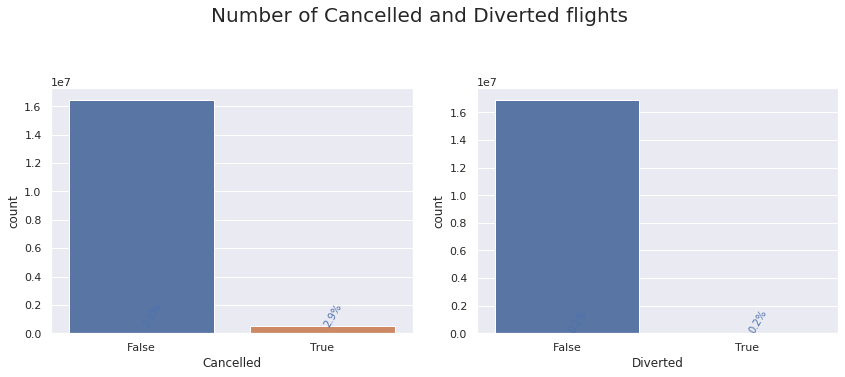

In [22]:
cols_interest = ['Cancelled', 'Diverted']

f = plt.figure(figsize=(12, 8))
gs = f.add_gridspec(len(cols_interest), 2)
for i, col in enumerate(cols_interest):
    ax = f.add_subplot(gs[int(i/2),i%2])
    #sns.boxplot(df2[col], kind="box");
    ax = sns.countplot(df2[col])
    ax.set_xticklabels(ax.get_xticklabels())
    #sns.distplot(df2[col], kde=False);
    # add annotations
    n_points = df2.shape[0]
    col_counts = df2[col].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = col_counts[bool(label.get_text())]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count+10, pct_string, ha = 'left', color = 'b', rotation=60, fontsize=10)

f.suptitle('Number of Cancelled and Diverted flights', fontsize=20, y = 1.1)
f.tight_layout()

* a total of 3.1% of all flights has been either cancelled or diverted

In [23]:
#df_canc = df2[df2['Cancelled'] == True]
#df_div = df2[df2['Diverted'] == True]

**Flights distribution over the years, months, days and carriers**

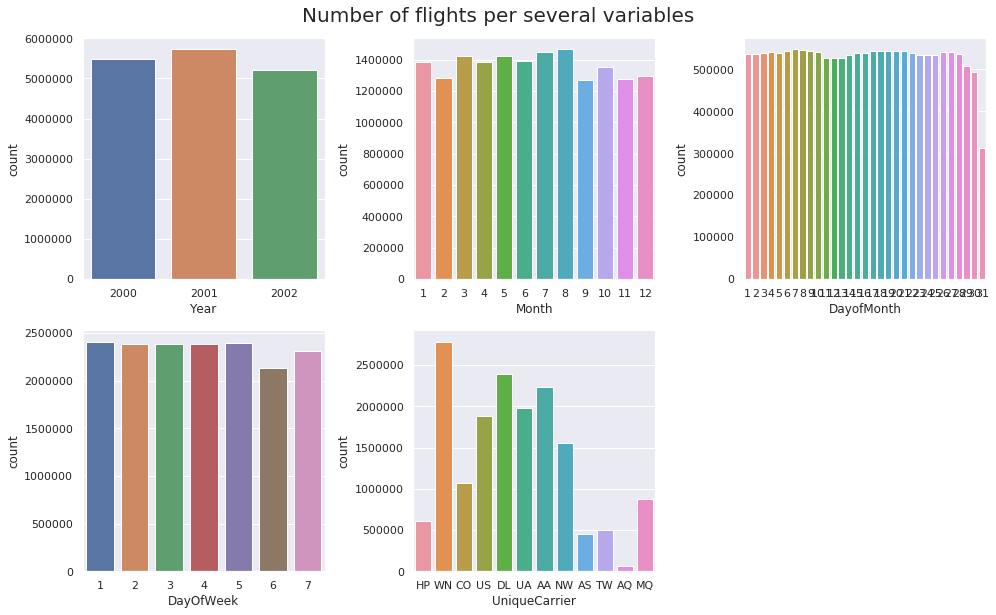

In [24]:
cols_interest = ['Year','Month', 'DayofMonth', 'DayOfWeek','UniqueCarrier']

f = plt.figure(figsize=(14, 20))
gs = f.add_gridspec(len(cols_interest), 3)
for i, col in enumerate(cols_interest):
    ax = f.add_subplot(gs[int(i/3),i%3])
    #sns.boxplot(df2[col], kind="box");
    ax = sns.countplot(df3[col])
    ax.set_xticklabels(ax.get_xticklabels())#, ha = 'right', rotation=60)
    #sns.distplot(df2[col], kde=False);
    # add annotations
    n_points = df3.shape[0]
    col_counts = df3[col].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels
    
f.suptitle('Number of flights per several variables', fontsize=20, y = 1.01)
f.tight_layout()

* Only `UniqueCarrier` shows significant differences

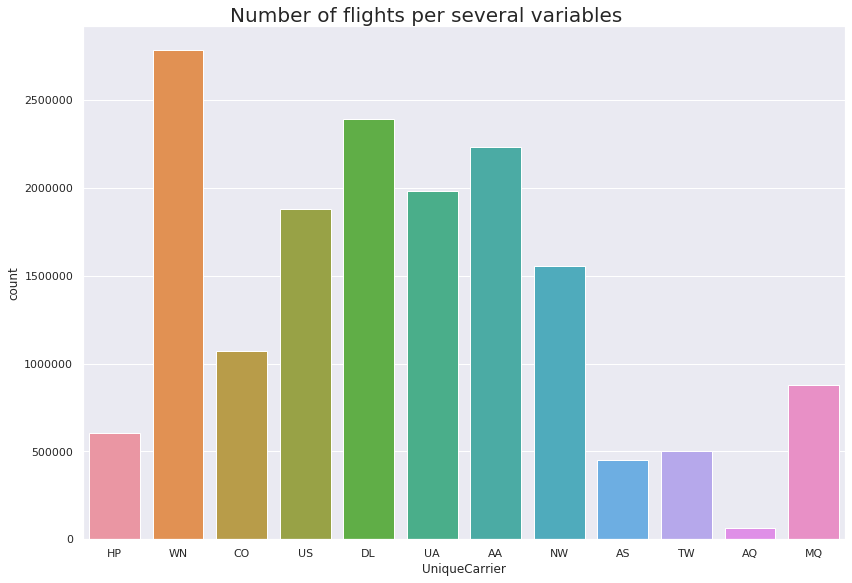

In [50]:
f = plt.figure(figsize=(12, 8))
ax = sns.countplot(df3['UniqueCarrier'])
f.suptitle('Number of flights per several variables', fontsize=20, y = 1.01)
f.tight_layout()

In [25]:
print(df_carr[df_carr['Code'] == "WN"])
print(df_carr[df_carr['Code'] == "DL"])

     Code             Description
1388   WN  Southwest Airlines Co.
    Code           Description
441   DL  Delta Air Lines Inc.


**Flight distance and air time distribution**

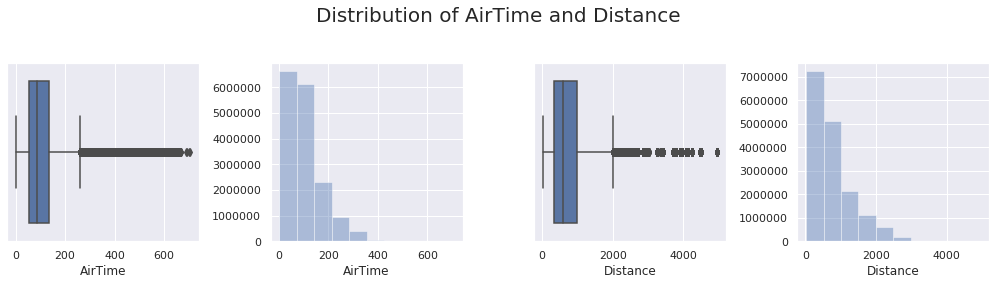

In [26]:
cols_interest = ['AirTime', 'Distance']

f = plt.figure(figsize=(14, 6))
gs = f.add_gridspec(len(cols_interest), 4)
for i, col in enumerate(cols_interest):
    ix, iy= int(i/2), (2 if i%2 else 0)
    ax = f.add_subplot(gs[ix,iy])
    ax = sns.boxplot(df3[col]);
    ax = f.add_subplot(gs[ix,iy+1])
    ax = sns.distplot(df3[col], bins = 10, kde=False);

f.suptitle('Distribution of AirTime and Distance', fontsize=20, y = 1.1)
f.tight_layout()

* Most flights are relatively short which is to be expected considering that the data is only for US domestic flights.

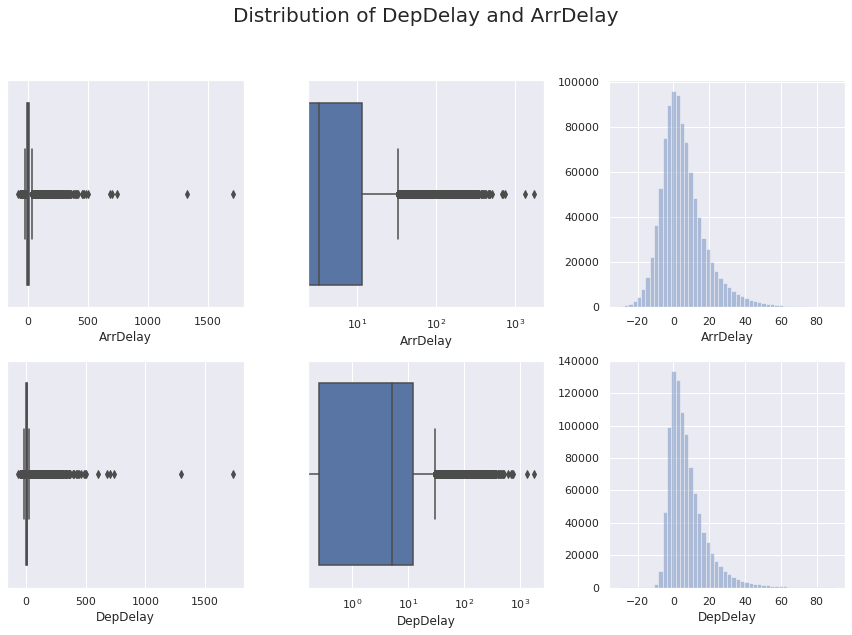

In [27]:
cols_interest = ['ArrDelay', 'DepDelay']

f = plt.figure(figsize=(12, 8))
gs = f.add_gridspec(len(cols_interest), 3)
for i, col in enumerate(cols_interest):
    
    ax = f.add_subplot(gs[i,0])
    ax = sns.boxplot(df_agg[col]);
    
    ax = f.add_subplot(gs[i,1])
    ax = sns.boxplot(df_agg[col]);
    ax.set(xscale="log");
    
    ax = f.add_subplot(gs[i,2])
    ax = sns.distplot(df_agg[col], kde=False, hist_kws={"range": [-30,90]});
        
f.suptitle('Distribution of DepDelay and ArrDelay', fontsize=20, y = 1.1)
f.tight_layout()

* While most flights take of on time or with minor delays, there is still a significant number of outliers with very long delay times.

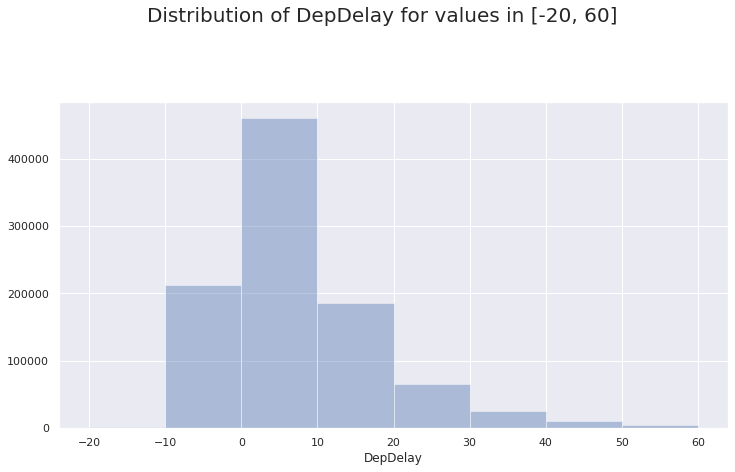

In [28]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.distplot(df_agg['DepDelay'], bins = 8, kde=False, hist_kws={"range": [-20,60]});
f.suptitle('Distribution of DepDelay for values in [-20, 60]', fontsize=20, y = 1.1)
plt.show()

* Zooming in on the distribution only strengthens the earlier notion.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The distribution of my variables of interest, `DepDelay` and `ArrDelay`, were very skewed and had lots of outliers.
* It needed to use a logarithmic scale to make it more readable.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* as the opposite of my expectations, the number of flights didn't change much between months, years and days of month/week, except for a minor slow down on Fridays.
* The number of flights per carrier varries a lot however, showing a market dominance for some carriers such as Southwest Airlines and Delta Air Lines .

## Bivariate Exploration

#### Finding Correlations

In [29]:
# Before calculating correlations, we need to encode time data in a way to better reflect its periodic nature
# applying a trigonometric transform will do the trick

cols_interest = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime']
df_corr = df3.copy()
for col in cols_interest:
    df_corr[col] = np.sin(2*np.pi*df_corr[col]/24.)
    
#Correlation matrix between features
corr_mat = df_corr.corr().abs()

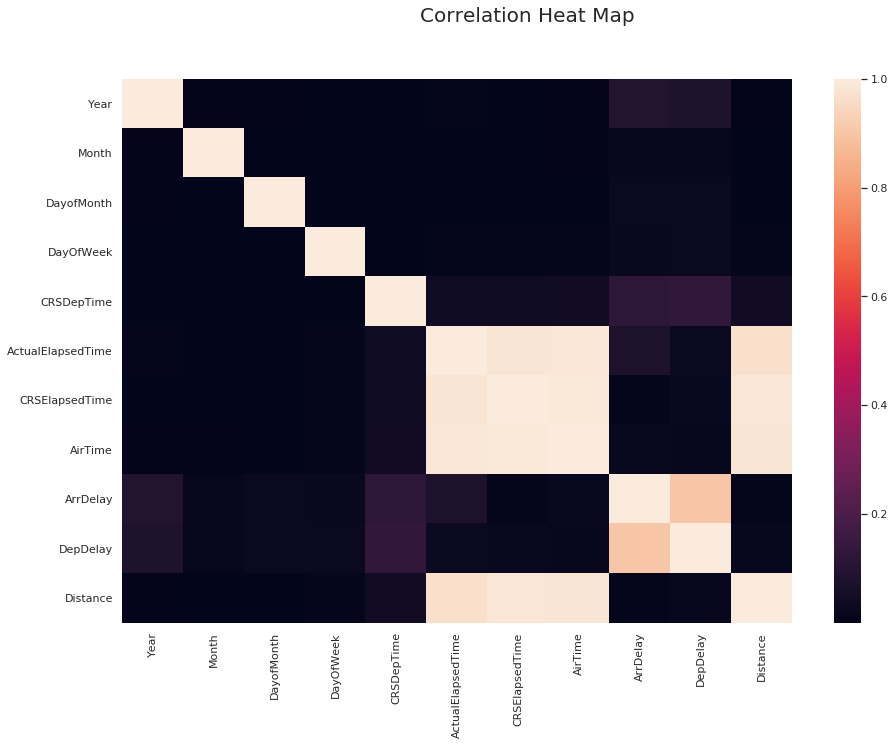

In [30]:
#Plot the heatmap with seaborn
plt.figure(figsize=(15,10)) 
sns.heatmap(corr_mat, 
        xticklabels=corr_mat.columns,
        yticklabels=corr_mat.columns);

plt.suptitle('Correlation Heat Map', fontsize=20);

* There are no strong correlations between ArrDelay, DepDelay and other variables, we need to investigate further.

#### DepDelay vs Categorical variables

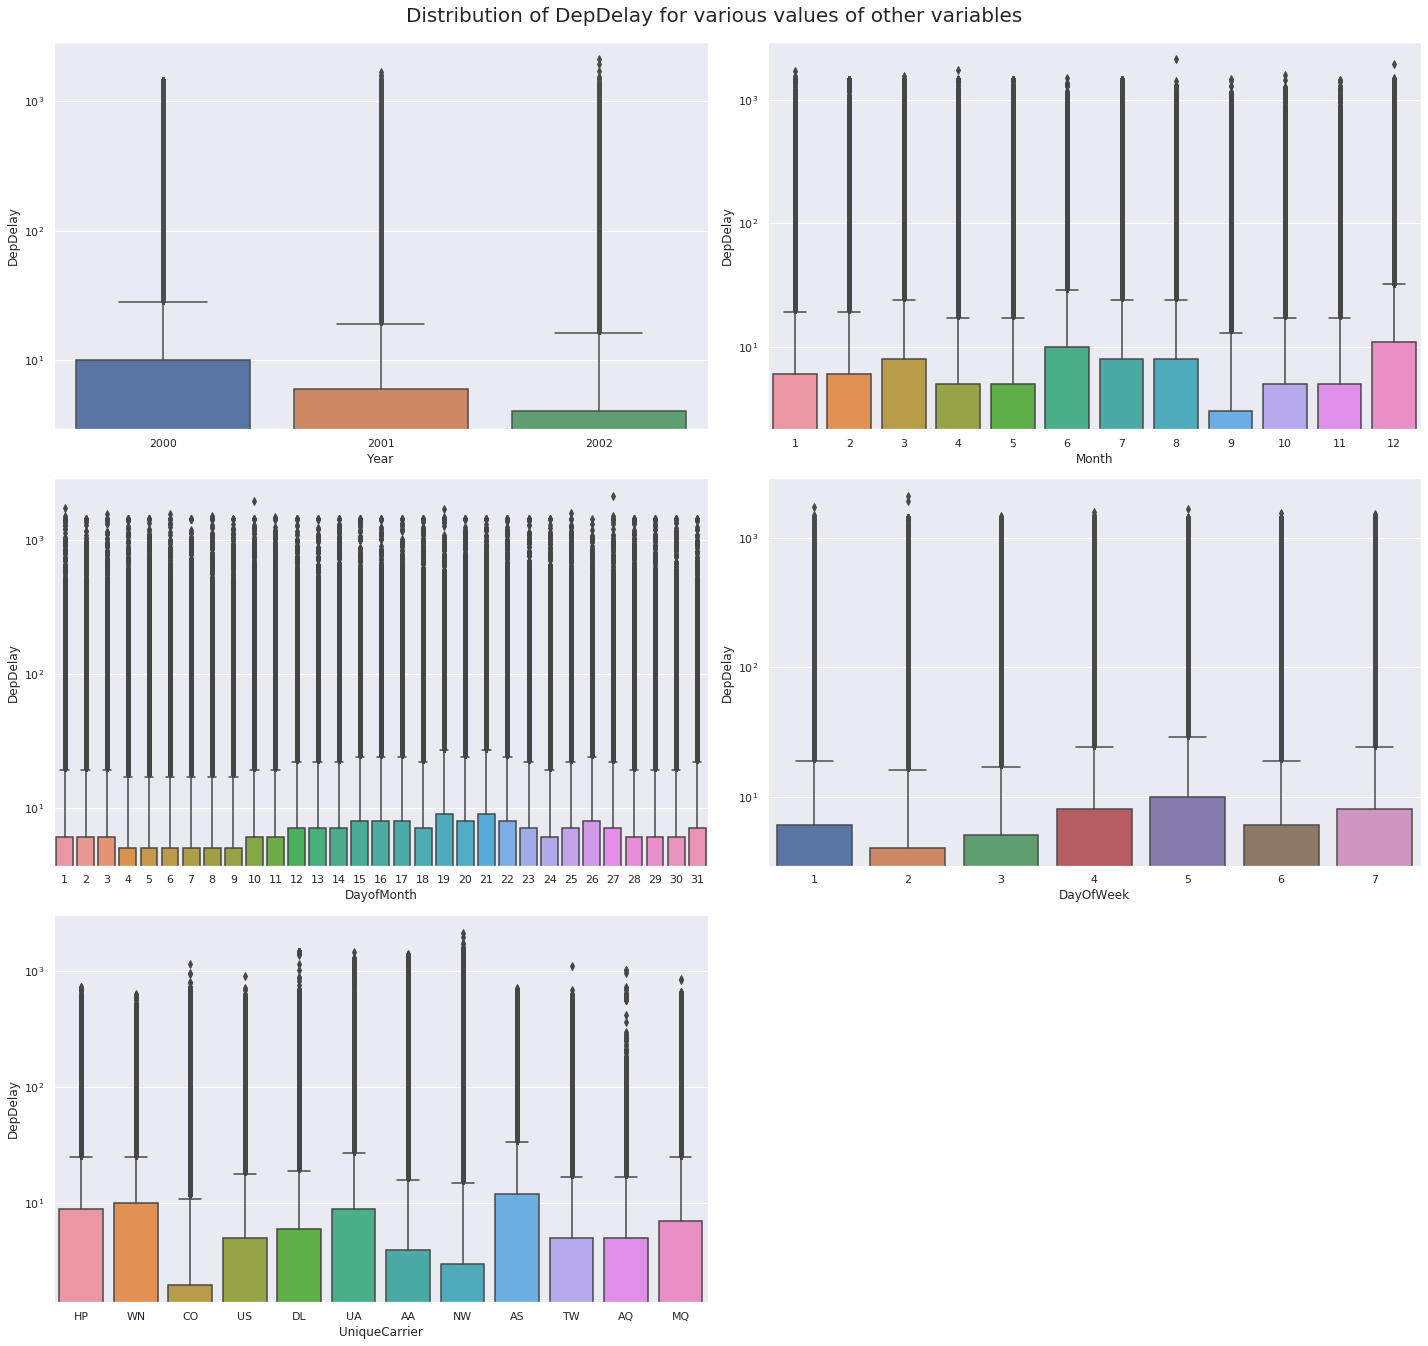

In [31]:
cols_interest = ['Year','Month', 'DayofMonth', 'DayOfWeek','UniqueCarrier']
    
f = plt.figure(figsize=(20, 30))
gs = f.add_gridspec(len(cols_interest), 2)
for i, col in enumerate(cols_interest):
    ax = f.add_subplot(gs[int(i/2),i%2])
    #sns.boxplot(df2[col], kind="box");
    ax = sns.boxplot(x=col, y="DepDelay", data=df3)
    ax.set(yscale="log");
    #sns.distplot(df2[col], kde=False);
    ax.set_xticklabels(ax.get_xticklabels())
        
f.suptitle('Distribution of DepDelay for various values of other variables', fontsize=20, y = 1.01)
f.tight_layout()

* Interesting, while the correlation isnot that strong as mentioned earlier, it seems that the first days of every week, and of every month see slightly less delays then the rest.
* We also see an overal improvement year over year.

**AirTime vs Distance**

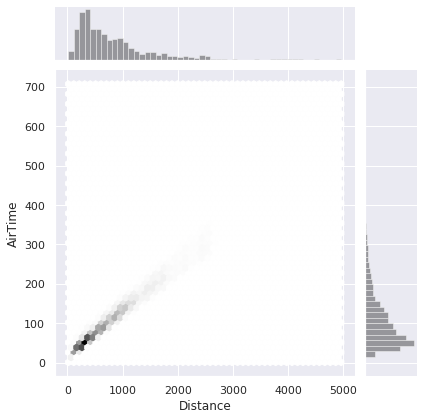

In [32]:
sns.jointplot(x='Distance', y='AirTime', data=df3, kind="hex", color="k");

* Not much can be learned from this

Text(0.5, 1.1, 'AirTime vs Distance')

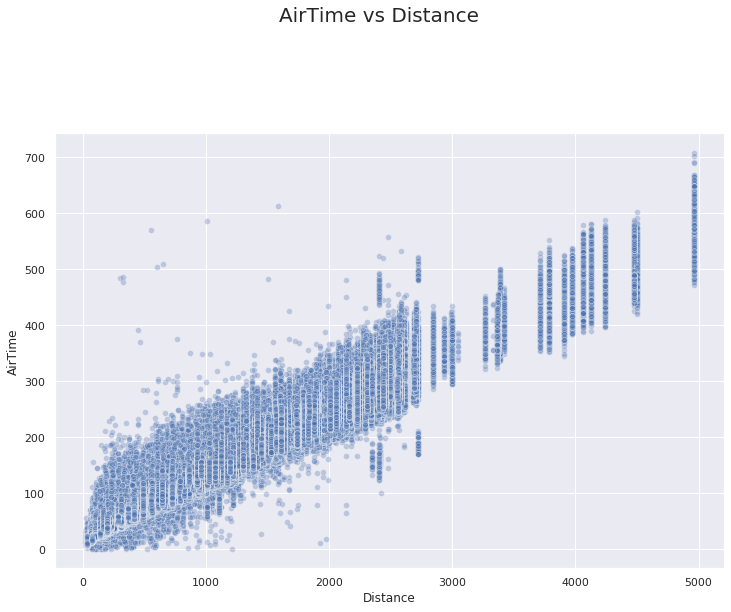

In [47]:
f = plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='Distance', y="AirTime", data=df3, alpha = 0.3);
f.suptitle('AirTime vs Distance', fontsize=20, y = 1.1);

* comes as no surprise, showing that distance and airtime have indeed a direct correlation.

**Flight numbers and delay averages over time**

In [33]:
df_tmp = df3.groupby(['Year', 'Month']).agg({'DayofMonth': 'count', 'DepDelay':'mean'}).rename(columns ={'DayofMonth':'NumberofFlights'})

ERROR! Session/line number was not unique in database. History logging moved to new session 75


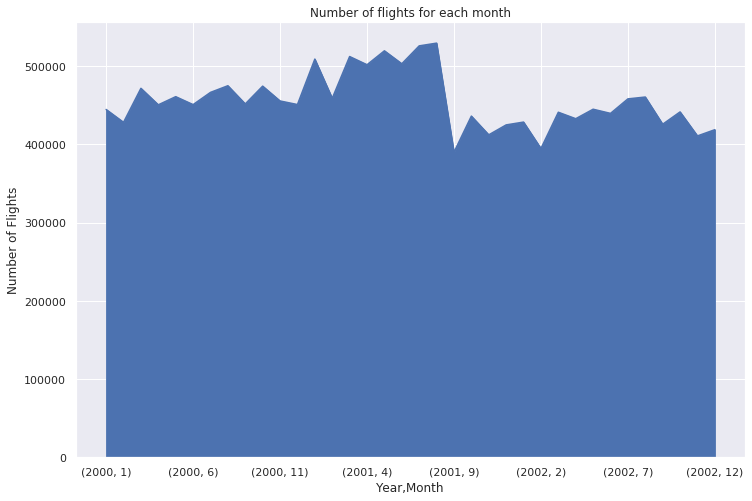

In [34]:
ax = df_tmp.drop(['DepDelay'], axis = 1).plot(figsize=(12,8), kind = 'area', legend = False, title = "Number of flights for each month")
ax.set(ylabel="Number of Flights");

* a sharp dip in the number of flights in September 2001, a direct result of the 9/11 attacks.

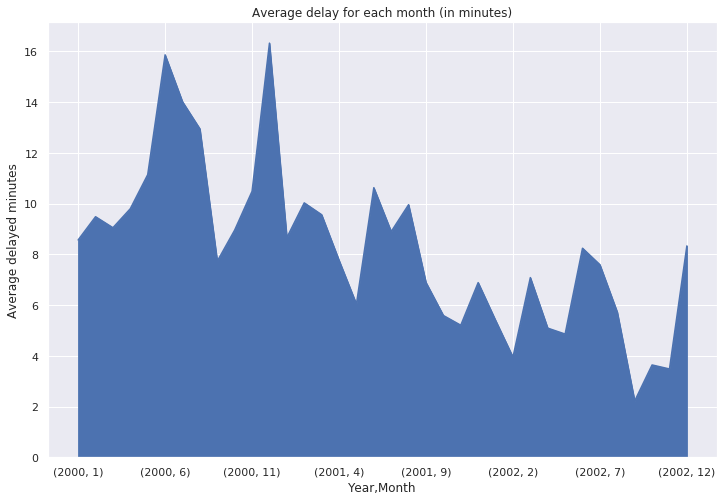

In [35]:
ax = df_tmp.drop(['NumberofFlights'], axis = 1).plot(figsize=(12,8), kind = 'area', legend = False, title = "Average delay for each month (in minutes)")
ax.set(ylabel="Average delayed minutes");

* seems like delays spike up in june and december of each year, which aligns perfectly with summer and end of year holidays
* Since previous exploration showed us no difference in the number of flights, it might be a an indicator of a higher number of passengers and more crowded flights.

In [36]:
df_tmp2 = df3.groupby(['Year', 'Month', 'DayOfWeek']).agg({'Distance': 'count', 'DepDelay':'mean'}).rename(columns ={'Distance':'NumberofFlights'})

**DepDelays vs NumberofFlights distribution**

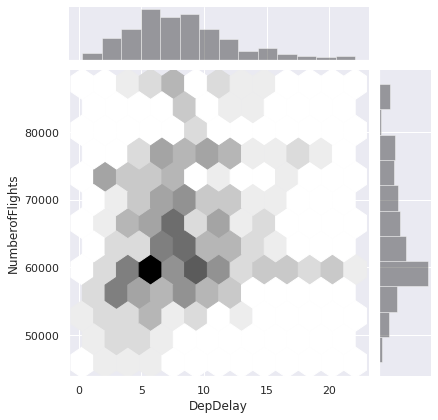

In [37]:
sns.jointplot(x='DepDelay', y='NumberofFlights', data=df_tmp2, kind="hex", color="k");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Some months see a clear rise in the average duration of delays.
* delays continuously reduced year over year.
* First days of each week and of each month have less/shorter delays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* The number of flights for each month was drastically reduced to some unfortunate events, breaking the up trend seen before it.

## Multivariate Exploration

Text(0.5, 1.01, 'DepDelays per Carrier and Year')

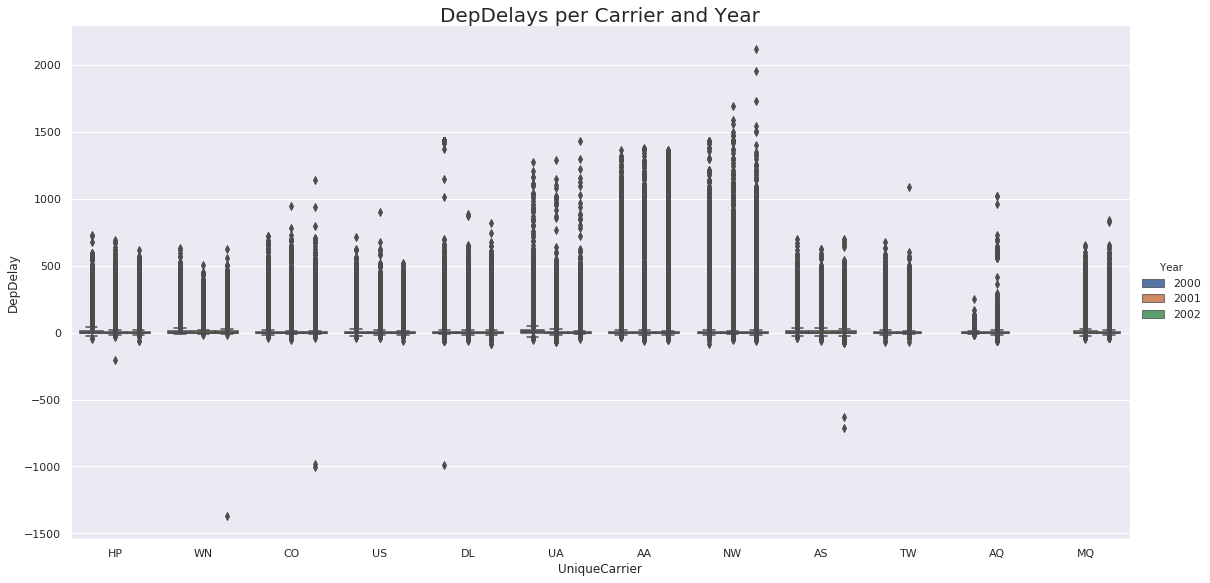

In [38]:
ax = sns.catplot(x="UniqueCarrier", y="DepDelay", hue="Year", kind="box", data=df3, height=8, aspect=2);
ax.fig.suptitle('DepDelays per Carrier and Year', fontsize=20, y = 1.01)

* Unreadable chart, need log scale

Text(0.5, 1.01, 'DepDelays per Carrier and Year')

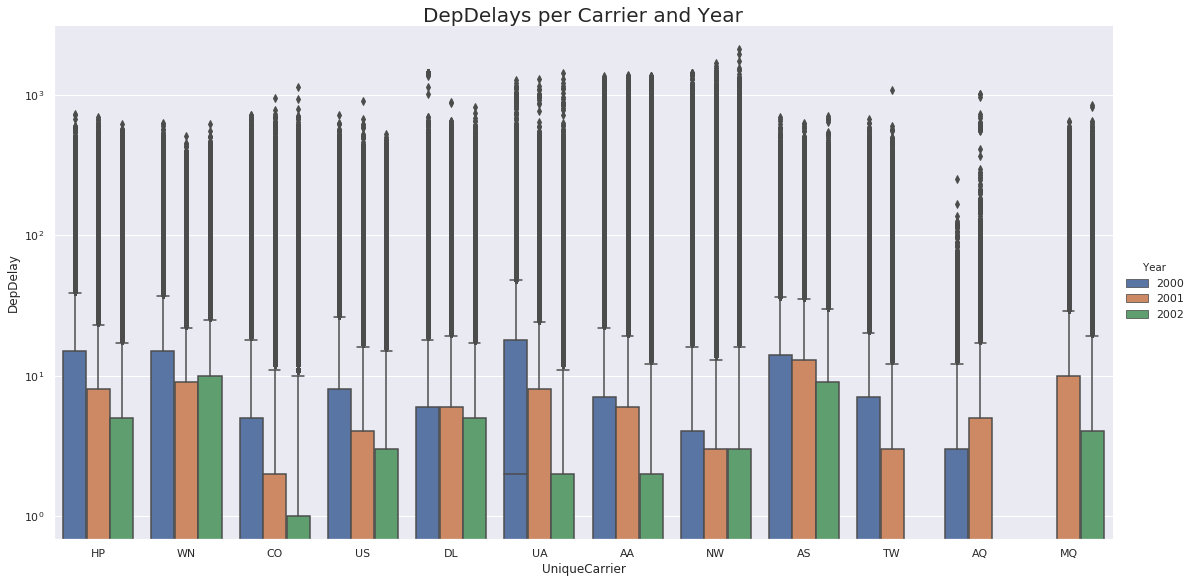

In [39]:
g = sns.catplot(x="UniqueCarrier", y="DepDelay", hue="Year", kind="box", data=df3, height=8, aspect=2);
g.set(yscale="log");
g.fig.suptitle('DepDelays per Carrier and Year', fontsize=20, y = 1.01)

Text(0.5, 1.01, 'DepDelays per Carrier and Year')

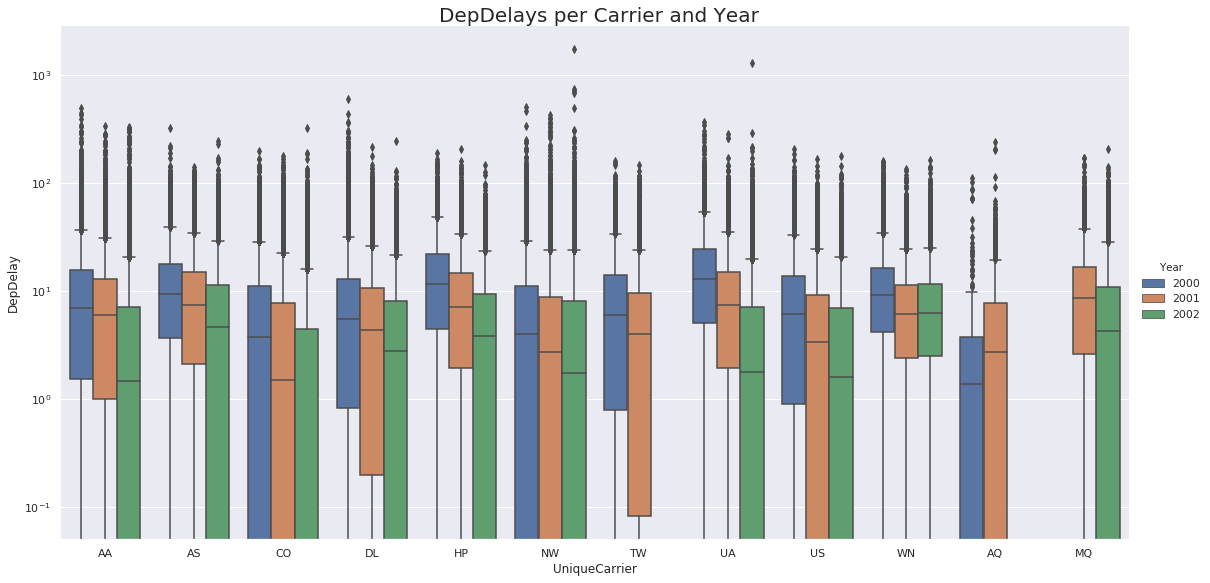

In [40]:
g = sns.catplot(x="UniqueCarrier", y="DepDelay", hue="Year", kind="box", data=df_agg, height=8, aspect=2);
g.set(yscale="log");
g.fig.suptitle('DepDelays per Carrier and Year', fontsize=20, y = 1.01)

In [41]:
print(df_carr[df_carr['Code'] == "AQ"])

    Code          Description
206   AQ  Aloha Airlines Inc.


* All airlines have been improving their services in terms of less/shorter delays except for Aloha Airlines which became worse over time.

In [42]:
df_tmp3 = df3[df3['Year'] == 2001]
df_tmp3 = df_tmp3[df_tmp3['Month'] == 9]

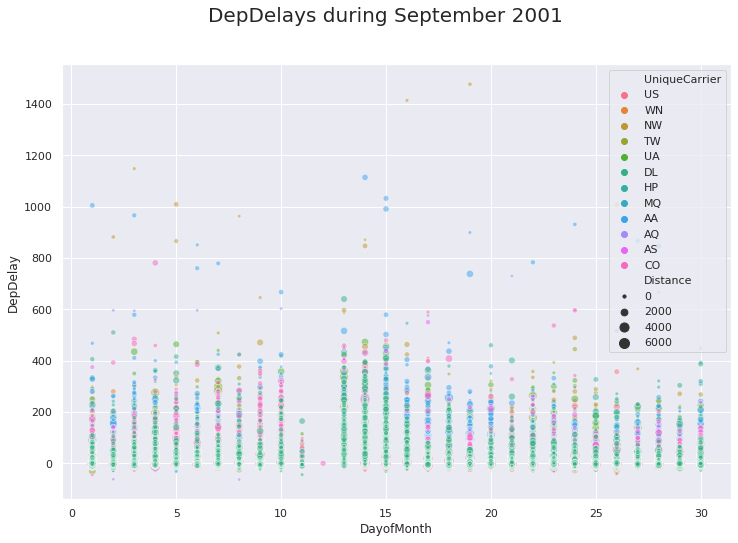

In [43]:
f = plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='DayofMonth', y="DepDelay", hue='UniqueCarrier', size='Distance', sizes=(10, 100),  data=df_tmp3, alpha = 0.5)
f.suptitle('DepDelays during September 2001', fontsize=20);

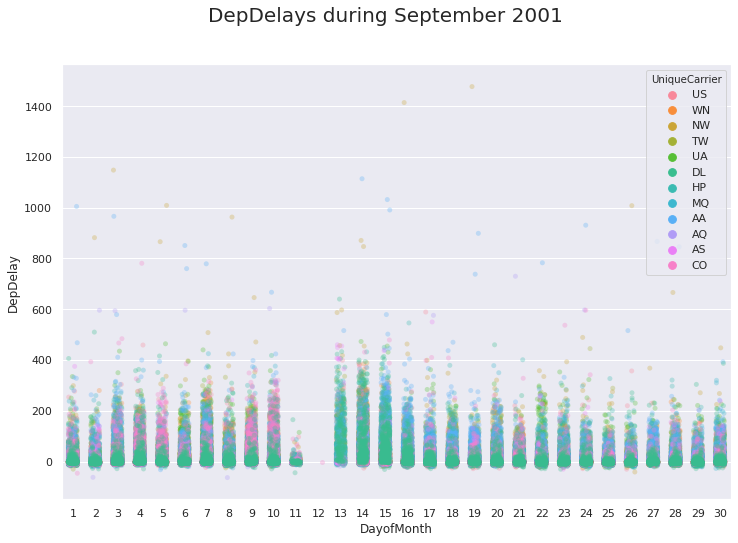

In [44]:
f = plt.figure(figsize=(12, 8))
#ax = sns.scatterplot(x='DayofMonth', y="DepDelay", hue='UniqueCarrier', size='Distance', sizes=(10, 100),  data=df_tmp3, alpha = 0.5)
ax = sns.stripplot(x='DayofMonth', y="DepDelay", hue='UniqueCarrier', data=df_tmp3, alpha = 0.3, jitter = 0.2)
f.suptitle('DepDelays during September 2001', fontsize=20);

* Flights came to a hold on the 9/12th of 2001.
* They started again the following day but with significantly more delaysthan usual.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Analyzing each carrier individually reasserts the notion that overall DepDelays improve each year.
* The effect of 9/11 can be seen very clearly in the dataset, for both long and short term.

### Were there any interesting or surprising interactions between features?

* Travel distance doesn't seem to correlate with delays, this means that most delays are caused while still on the ground.

## References

* Seaborn [Tutorial](https://seaborn.pydata.org/tutorial.html) and [API Docs](https://seaborn.pydata.org/api.html)
* Pandas [documentation](https://pandas.pydata.org/docs/).

In [48]:
from subprocess import call
call(["python", "-m", "nbconvert", "P5_exploration.ipynb"])

0